<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [9]</a>'.</span>

# HarvestStat Data Profiling - Benin

In [1]:
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import geopandas as gpd
from tools import retreive_fdw_data, save_npz, PrintAdminUnits, PlotAdminShapes
from tools import FDW_PD_Sweeper, FDW_PD_AvalTable, FDW_PD_Compiling, FDW_PD_ValidateFnidName
from tools import FDW_PD_CreateAdminLink, FDW_PD_RatioAdminLink, FDW_PD_ConnectAdminLink
from tools import product_name_mapping, FDW_PD_CaliSeasonYear, FDW_PD_MergeCropProductionSystem
from tools_graphic import PlotBarProduction, PlotLinePAY
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

In [2]:
# Set loading parameters ------------------------ #
country_name = 'Benin'
country_iso2 = 'BJ'
use_api_data = False
requires_authentication = False
# ----------------------------------------------- #

# Load FEWS NET administrative boundaries ------- #
epsg = 'epsg:32631' # Benin
fn_shapes = sorted(glob.glob(f"../data/shapefile/fewsnet/{country_iso2}_Admin?_????.shp"))
shape_all = []
for fn in fn_shapes:
    name = fn[-18:-4]
    exec('%s = gpd.read_file("%s").to_crs("%s")' % (name, fn, epsg))
    exec('%s["area"] = %s["geometry"].area/10**6' % (name, name))
    exec('shape_all.append(%s)' % (name))
shape_all = pd.concat(shape_all, axis=0).reset_index(drop=True)
# PrintAdminUnits(shape_all)
# ----------------------------------------------- #

# Load FDW data -------------------------------- #
df = retreive_fdw_data(country_name, country_iso2, use_api_data, requires_authentication)
# ----------------------------------------------- #

Data is loaded from the local file.
../data/crop_raw_data/adm_crop_data_raw_BJ.csv is loaded.


In [3]:
# Manual Pre-processing before Sweeping --------- #
# 1. Default setting 
# a) None-type crop production system
df.loc[df['crop_production_system'].isna(), 'crop_production_system'] = 'none'
df.loc[df['crop_production_system'] == '', 'crop_production_system'] = 'none'
# b) None-type population group
df.loc[df['population_group'].isna(), 'population_group'] = 'none'
df.loc[df['population_group'] == '', 'population_group'] = 'none'
# ----------------------------------------------- #
df = df[np.isfinite(df.value)]
df_admin1=df[df['admin_2'].isna()]
df = df.dropna(subset=['admin_2'])

# FDW Production Data Inspection ---------------- #
df, df_raw = FDW_PD_Sweeper(df, area_priority="Area Planted")
table_dict = FDW_PD_AvalTable(df, shape_all)
# ----------------------------------------------- #

# FEWS NET Shapefile comparison ----------------- #
shape_used = pd.concat([BJ_Admin2_1982, BJ_Admin2_1999, BJ_Admin2_2015], axis=0)
PlotAdminShapes(shape_used, label=True)
# ----------------------------------------------- #

- Remove missing records ---------------------- #
Orignial data points: 79,081
26,367/26,367 "Area Harvested" points are retained.
26,359/26,359 "Quantity Produced" points are retained.
26,355/26,355 "Yield" points are retained.
Current data points: 79,081



- Minor changes are applied ------------------- #

- Basic information --------------------------- #


Data period: 1995 - 2021
32 grain types are found: African Eggplant, Bambara groundnut, Cabbage (Unspecified), Carrots, Cassava, Colocynth, Cowpea (unspecified), Cucumber, Fonio, Geocarpa groundnut, Goussi, Green pea, Groundnuts (In Shell), Jews mallow leaves, Lettuce (Unspecified), Maize (Corn), Millet (Foxtail), Okras (Fresh), Onions, Pigeon pea (Unspecified), Pineapple (unspecified), Potato (unspecified), Rice (Paddy), Sesame Seed, Sorghum, Soybean (unspecified), Sugarcane (for sugar), Sweet Potatoes, Taro/Cocoyam (Unspecified), Tomato, Watermelon, Yams
2 seasons are found: Main (11-01), Annual (12-01)
1 crop production system are found: All (PS)
Data sources include:
[1] INSAE, Benin --- Official agricultural statistics, Benin
[2] MAEP (DSA), Benin --- Official agricultural statistics, Benin
Administrative-1 fnids: 0
Administrative-2 fnids: 230
0 reporting units are found: 

- Total production over time ------------------ #


season_name                Annual   Main
                                        
African Eggplant             0.3%   0.0%
Bambara groundnut            0.0%   0.2%
Cabbage (Unspecified)        0.0%   0.0%
Carrots                      0.0%   0.0%
Cassava                     40.7%   0.0%
Colocynth                    0.0%   0.0%
Cowpea (unspecified)         0.0%   1.2%
Cucumber                     0.0%   0.0%
Fonio                        0.0%   0.0%
Geocarpa groundnut           0.0%   0.0%
Goussi                       0.0%   0.1%
Green pea                    0.0%   0.0%
Groundnuts (In Shell)        0.0%   1.7%
Jews mallow leaves           0.0%   0.1%
Lettuce (Unspecified)        0.1%   0.0%
Maize (Corn)                 0.0%  13.8%
Millet (Foxtail)             0.0%   0.4%
Okras (Fresh)                0.5%   0.0%
Onions                       0.0%   0.5%
Pigeon pea (Unspecified)     0.0%   0.0%
Pineapple (unspecified)      0.6%   0.0%
Potato (unspecified)         0.0%   0.0%
Rice (Paddy)    

- Recorded years per season ------------------- #
Main: 27 years (1995-2021) (missing: 0 years)
Annual: 27 years (1995-2021) (missing: 0 years)

- Number of "Quantity Produced" data points --- #
BJ1982A2: 4,350 data points are found.


BJ1999A2: 14,306 data points are found.
BJ2015A2: 7,703 data points are found.

- Districts with population group(s) ---------- #
0 districts includes 'population_group'.

Table of available data


----------------------------------------------- #
Crop type: African Eggplant
----------------------------------------------- #
season_name              Annual              
crop_production_system All (PS)              
fnid_short               1982A2 1999A2 2015A2
year                                         
1995                      49/77   1/77    NaN
1996                      62/77   1/77    NaN
1997                      69/77   1/77    NaN
1998                      70/77   1/77    NaN
1999                        NaN  71/77    NaN
2000                        NaN  64/77    NaN
2001                        NaN    NaN    NaN
2002                        NaN    NaN    NaN
2003                        NaN    NaN    NaN
2004                        NaN    NaN    NaN
2005                        NaN    NaN    NaN
2006                        NaN    NaN    NaN
2007                        NaN    NaN    NaN
2008                        NaN    NaN    NaN
2009                        NaN    NaN    Na

../figures/BJ_admin_shapes.png is saved.


- Benin crop seasonal calendar

<img src="https://ipad.fas.usda.gov/rssiws/al/crop_calendar/images/wafrica_bn_calendar.png"  width=900>

- comparison of boundaries</br>

<img src="../figures/BJ_admin_shapes.png"  width=900>

- In Benin, basd on the FEWS NET data, there were two times of changes in administrative units. We will use the 2015 administrative units

| Year  | Admin-1  | # units  | Admin-2  | # units | Admin-3  | # units |
| :---: | :----:   | :----:   | :----:   | :---:   | :----:   | :---:   |
| 1982	 | BJ1982A1 | 6	| BJ1982A2	| 77	| nan	| 0	|
| 1999	 | BJ1999A1 | 12	| BJ1999A2	| 77	| nan	| 0	|
| 2015	 | BJ2015A1 | 12	| BJ2015A2	| 77	| nan	| 0	|


In [4]:
# Define the latest shapefile ------------------- #
latest_level = 2
shape_latest = BJ_Admin2_2015.copy().to_crs('epsg:32621')
# ----------------------------------------------- #

# Validation of FNIDs and Names ----------------- #
df = FDW_PD_ValidateFnidName(df, shape_used, shape_latest)
# ----------------------------------------------- #

# FDW Production Data Compiling ----------------- #
area, prod = FDW_PD_Compiling(df, shape_used)
area_all, prod_all = area.copy(), prod.copy()
mdx_pss = area.columns.droplevel([0,1]).unique()
# ----------------------------------------------- #

In [5]:
# Link admin boundaries ------------------------- #
link_1982, over_1982 = FDW_PD_CreateAdminLink(BJ_Admin2_1982, BJ_Admin2_2015, 'ADMIN2', 'ADMIN2', prod, epsg)
# assert all(np.unique([v['method'] for k,v in link_1982.items()]) == 'PBR')
link_1999, over_1999 = FDW_PD_CreateAdminLink(BJ_Admin2_1999, BJ_Admin2_2015, 'ADMIN2', 'ADMIN2', prod, epsg)
# assert all(np.unique([v['method'] for k,v in link_1999.items()]) == 'PBR')
# Crop specific ratios
link_ratio_1982 = FDW_PD_RatioAdminLink(link_1982, prod, over_1982, mdx_pss)
link_ratio_1999 = FDW_PD_RatioAdminLink(link_1999, prod, over_1999, mdx_pss)
# Merge link_ratio
assert link_ratio_1982.keys() == link_ratio_1999.keys()
link_merged = [link_ratio_1982, link_ratio_1999]
fnids_new = list(link_merged[0].keys())
link_ratio = dict()
for fnid in fnids_new:
    container = []
    for link in link_merged:
        container.append(link[fnid])
    link_ratio[fnid] = pd.concat(container, axis=1)
# Add current unit to link_ratio
for fnid_new in link_ratio.keys():
    link_ratio[fnid_new][fnid_new] = 1.0
    link_ratio[fnid_new] = link_ratio[fnid_new].sort_index(axis=1, ascending=False)
# Connect data with AdminLink
area_new, prod_new = FDW_PD_ConnectAdminLink(link_ratio, area, prod, validation=True)
# ----------------------------------------------- #

In [6]:
# Manual correction ----------------------------- #
crop_new = prod_new/area_new

# Complete long format DataFrame ---------------- #
df_area = area_new.T.stack().rename('value').reset_index()
df_area['indicator'] = 'area'
df_prod = prod_new.T.stack().rename('value').reset_index()
df_prod['indicator'] = 'production'
df_yield = crop_new.T.stack().rename('value').reset_index()
df_yield['indicator'] = 'yield'
stack = pd.concat([df_area, df_prod, df_yield], axis=0)
# Add "planting year"
cols = ['season_name','product','crop_production_system','planting_month','harvest_year','harvest_month','planting_year']
season_table = df[cols].drop_duplicates()
stack = stack.merge(season_table, on=cols[:-1])
# Add country and admin names
stack = stack.merge(df[['fnid','country','country_code','admin_1','admin_2']].drop_duplicates(), on='fnid', how='inner')
names = [
    'fnid','country','country_code','admin_1','admin_2','name',
    'product','season_name','planting_year','planting_month','harvest_year','harvest_month',
    'crop_production_system','indicator','value'
]
stack = stack[names]
# ----------------------------------------------- #

# Final Processing ------------------------------ #
# Product name mapping
stack = product_name_mapping(stack, list_except=None)
# Calibration of crop calendar using External Season Calendar (ESC)
esc = pd.read_csv('../data/crop_calendar/external_season_calendar.csv')
stack, link_ratio = FDW_PD_CaliSeasonYear(stack, esc, link_ratio=None)
# None admin names
stack.loc[stack['admin_1'].isna(), 'admin_1'] = 'none'
stack.loc[stack['admin_2'].isna(), 'admin_2'] = 'none'
# ----------------------------------------------- #


All [country, season_name] are in the external season calendar.


In [7]:

# Save data
fn_out = '../data/crop/adm_crop_production_BJ.csv'
stack.to_csv(fn_out); print(f'{fn_out} is saved.')
save_npz('../data/crop/adm_crop_production_BJ_ratio.npz', link_ratio)

../data/crop/adm_crop_production_BJ.csv is saved.


../data/crop/adm_crop_production_BJ_ratio.npz is saved.


# Visualization of production data

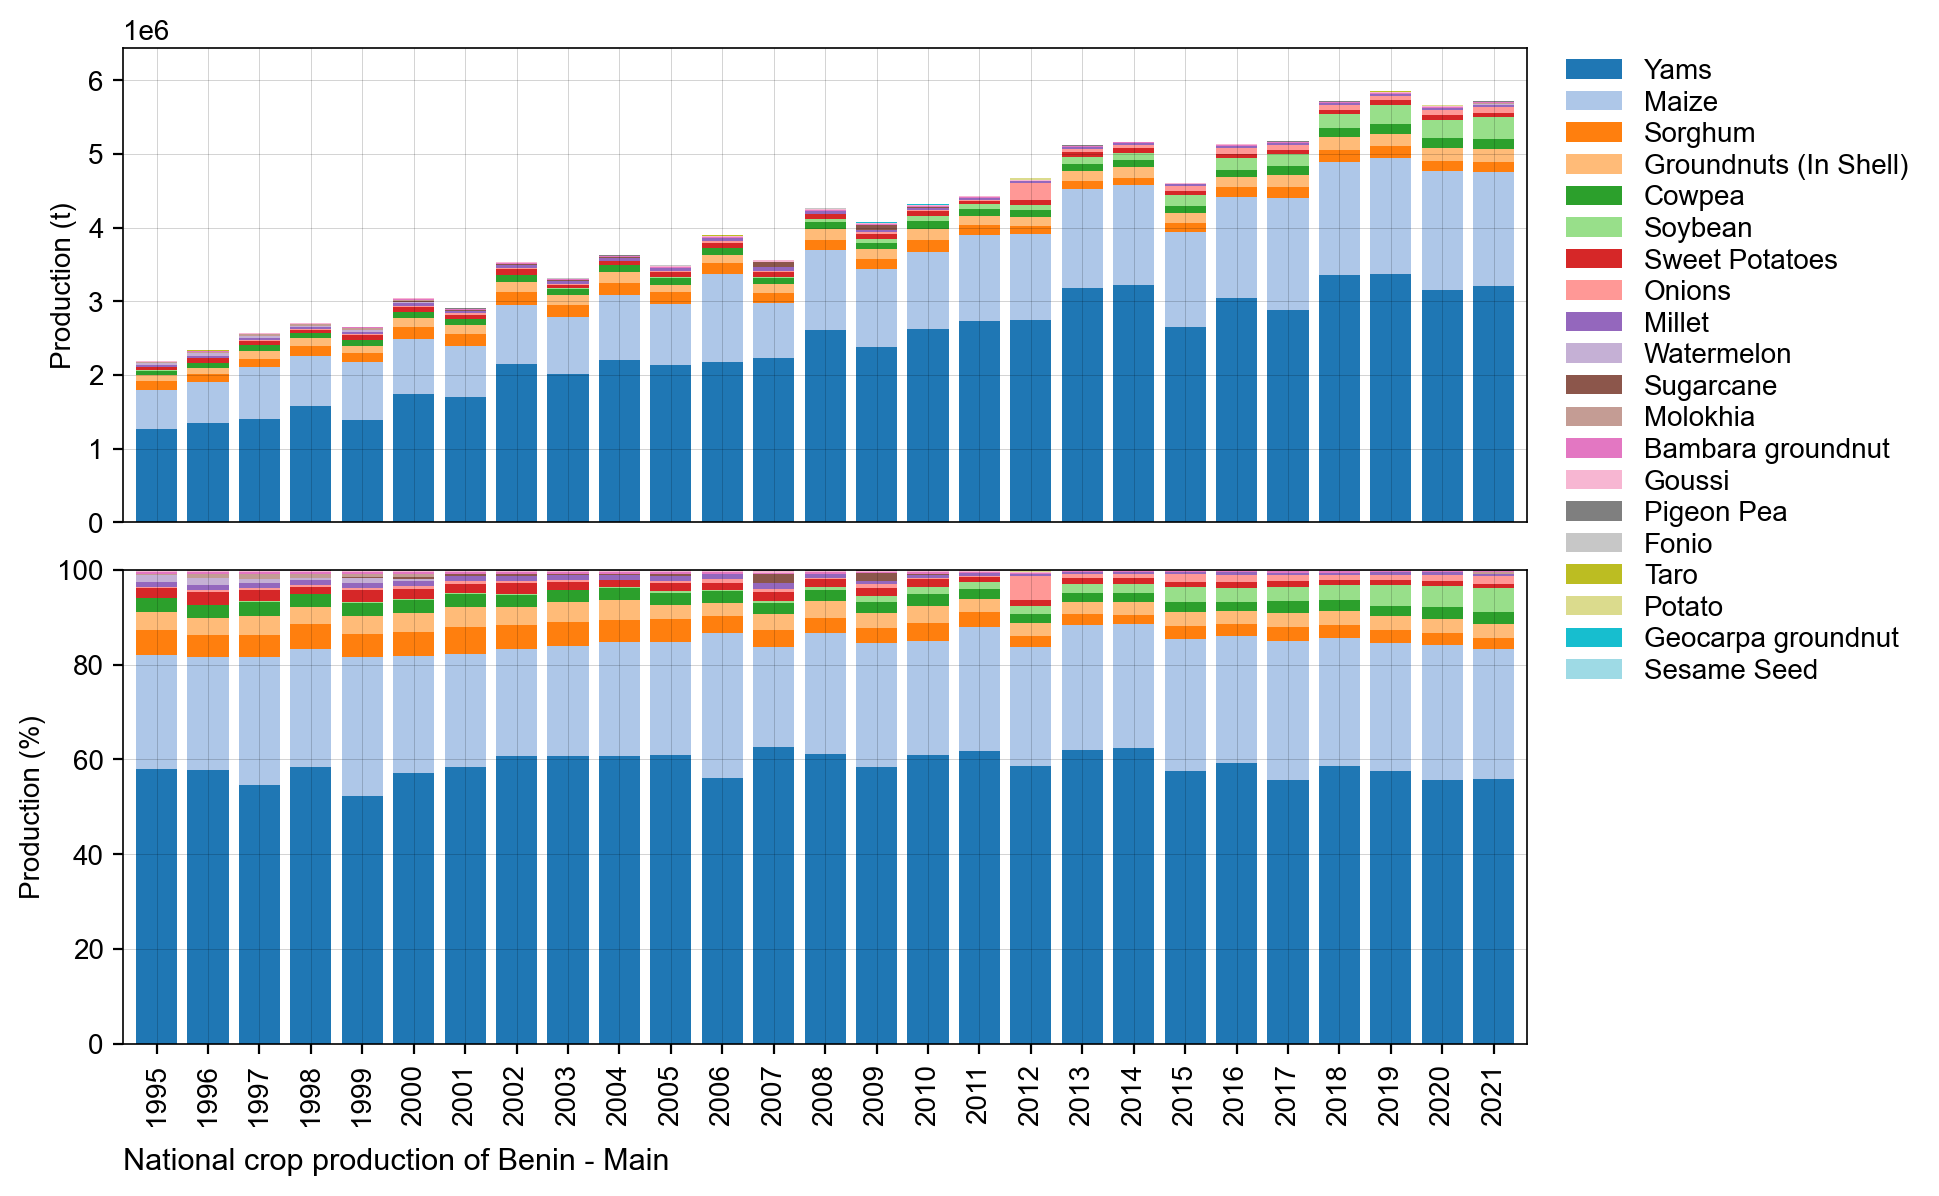

../figures/BJ_bar_natgrainprod_Main.png is saved.


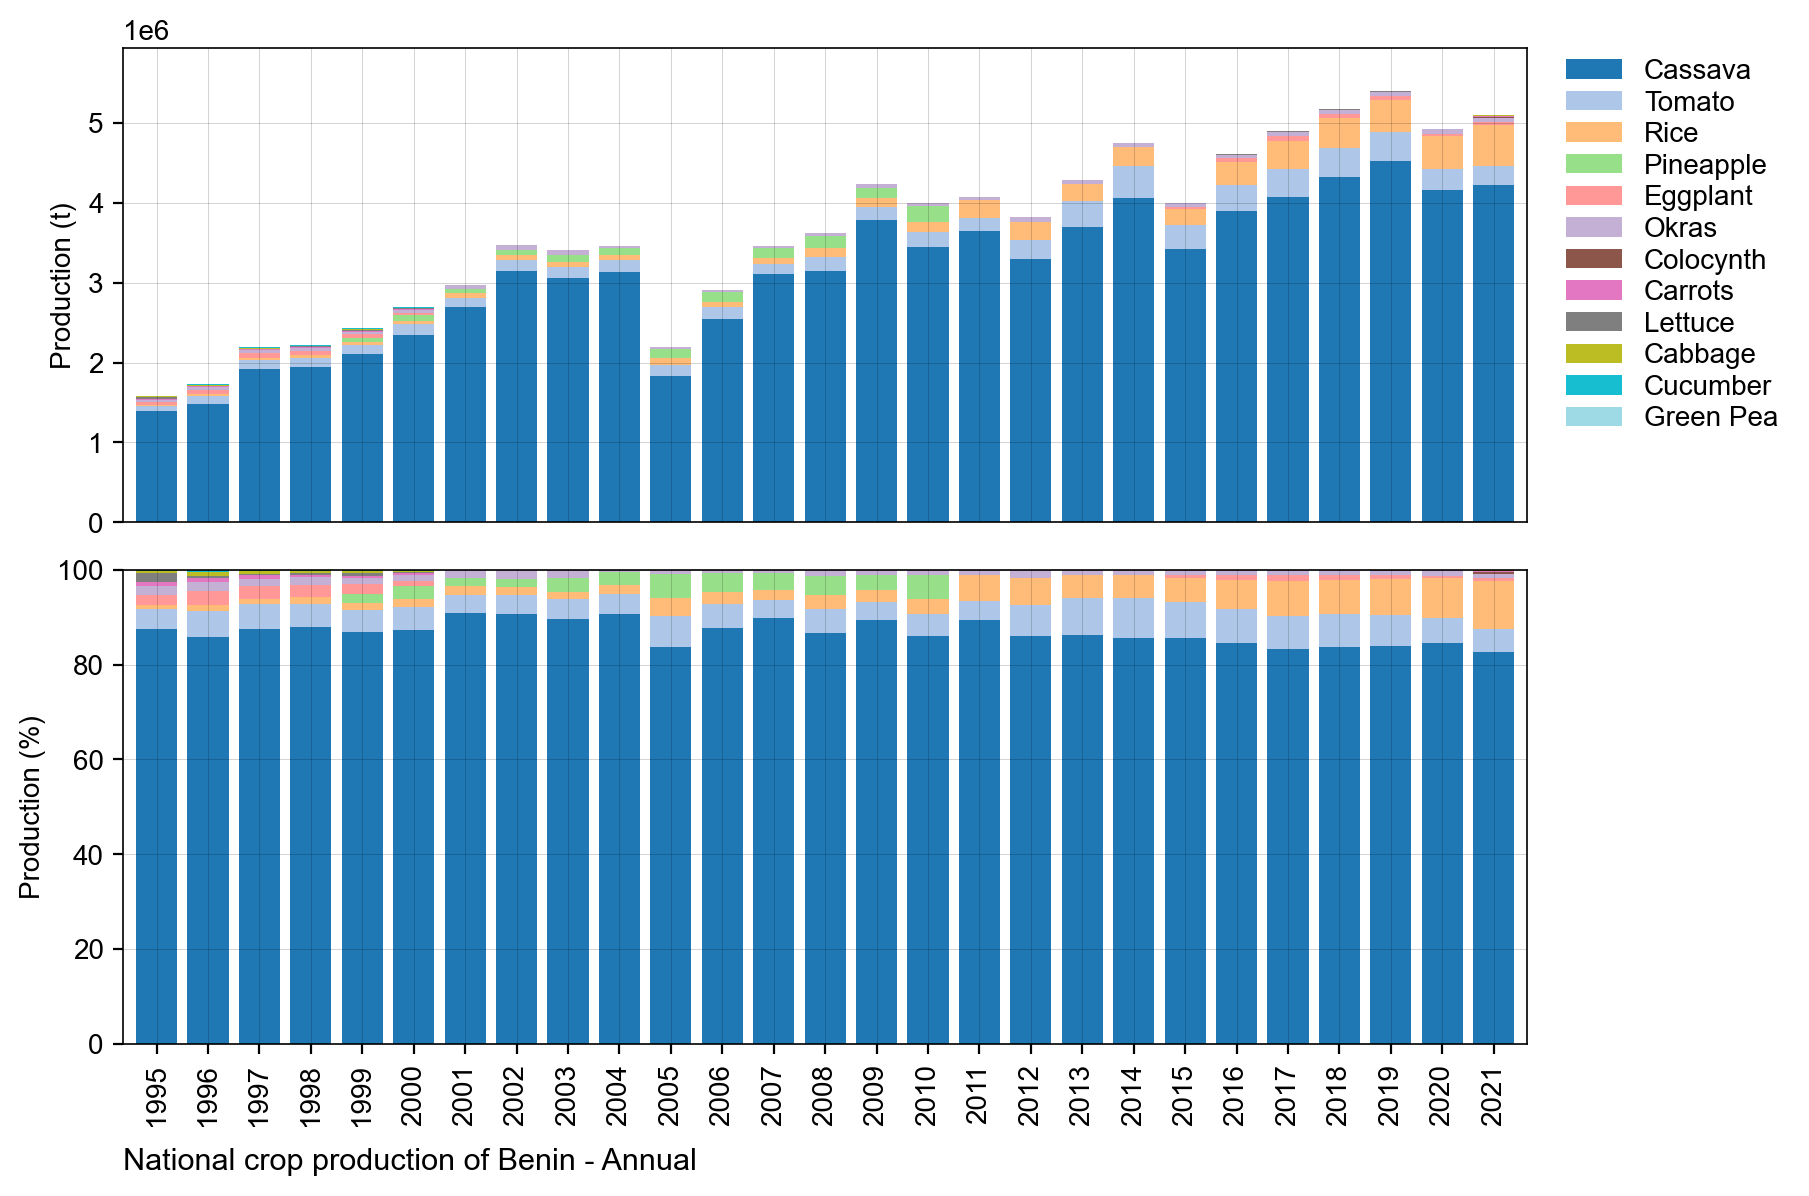

../figures/BJ_bar_natgrainprod_Annual.png is saved.


In [8]:
# Bar chart of national crop production
country_iso, country_name = 'BJ', 'Benin'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
for season_name in ['Main', 'Annual']:
    footnote = 'National crop production of %s - %s' % (country_name, season_name)
    fn_save = '../figures/%s_bar_natgrainprod_%s.png' % (country_iso, season_name)
    sub = df[df['season_name'] == season_name]
    PlotBarProduction(sub, year, footnote, fn_save)

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [9]:
# Lineplot of Production-Area-Yield time-series
country_iso, country_name = 'BJ', 'Benin'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df = df[df['QC_flag'] == 0] # remove outliers
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
product_season = [
    ['Yams','Main'],
    ['Maize','Main'],
    ['Sorghum','Main'],
    ['Groundnuts (In Shell)','Main'],  
    ['Rice','Annual'],
    ['Cassava','Annual'],
]
for product_name, season_name in product_season:
    footnote = 'Time-series of %s - %s - %s' % (country_iso, product_name, season_name)
    fn_save = '../figures/%s_line_pay_%s_%s.png' % (country_iso, product_name, season_name)
    sub = df[(df['product'] == product_name) & (df['season_name'] == season_name)]
    PlotLinePAY(sub, year, footnote)

KeyError: 'QC_flag'